# Assignment 5

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [194]:
import lxml.html as lh
import urllib2
import requests
import requests_cache
import pandas as pd

requests_cache.install_cache()

from lxml import etree

In [195]:
def get_url(url, page):
    urllist = []
    for i in range(1, page + 1):
        response = url + "page/" + "{}".format(i)
        res = requests.get(response)
        doc = lh.fromstring(res.content)
        link = doc.xpath("//article[@class='entry-content']/p/a/@href")
        urllist.extend(link)
    return urllist

In [196]:
get_url('https://theaggie.org/campus/',2)

['https://theaggie.org/2017/02/17/uc-davis-students-participate-in-uc-wide-nodapl-day-of-action/',
 'https://theaggie.org/2017/02/17/uc-davis-holds-first-mental-health-conference/',
 'https://theaggie.org/2017/02/16/last-week-in-senate-6/',
 'https://theaggie.org/2017/02/16/2017-asucd-winter-elections-meet-the-candidates/',
 'https://theaggie.org/2017/02/14/shields-library-hosts-new-exhibit-for-davis-centennial/',
 'https://theaggie.org/2017/02/14/student-health-and-counseling-services-hosts-step-up-to-the-plate-campaign/',
 'https://theaggie.org/2017/02/13/pe-classes-may-charge-additional-fees/',
 'https://theaggie.org/2017/02/12/11-new-chancellor-fellows-honored-for-2016/',
 'https://theaggie.org/2017/02/12/muslim-students-respond-to-recent-political-events/',
 'https://theaggie.org/2017/02/12/sexcessful-campaign-launched-in-time-for-valentines-day/',
 'https://theaggie.org/2017/02/10/michael-chan-sworn-in-as-interim-senator/',
 'https://theaggie.org/2017/02/09/university-of-californ

In [4]:
get_url('https://theaggie.org/arts/',3)

['https://theaggie.org/2017/02/16/a-night-under-the-stars/',
 'https://theaggie.org/2017/02/14/critically-acclaimed-stand-up-comic-brian-regan-to-perform-at-mondavi-center/',
 'https://theaggie.org/2017/02/13/burning-love-parody-of-the-bachelor/',
 'https://theaggie.org/2017/02/12/the-bachelor-engages-viewers-prompts-viewing-rituals/',
 'https://theaggie.org/2017/02/12/seven-movies-from-the-seven-countries-targeted-by-president-trumps-muslim-ban/',
 'https://theaggie.org/2017/02/12/the-best-of-times-and-the-worst-of-times-a-valentines-day-playlist/',
 'https://theaggie.org/2017/02/09/events-calendar-for-february/',
 'https://theaggie.org/2017/02/09/hopped-up-comedy-x-arrives-in-time-for-valentines-day-weekend/',
 'https://theaggie.org/2017/02/07/top-three-places-to-eat-when-hungover/',
 'https://theaggie.org/2017/02/06/dance-dance/',
 'https://theaggie.org/2017/02/06/skams-universal-appeal/',
 'https://theaggie.org/2017/02/06/t-v-revisited-breaking-bad/',
 'https://theaggie.org/2017/02

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

In [5]:
import lxml.etree

In [6]:
def extract_url(url):
    res = requests.get(url)
    doc = lh.fromstring(res.content)
    author = doc.xpath("//div[@itemprop]/p//*[contains(text(),'Written')]/text()")
    author = ''.join(author)
    title = doc.xpath("//h1[@class]/text()")
    title = ''.join(title)
    text = doc.xpath("//p/span/text()")
    
    for i in range(0, len(text)):
        if isinstance(text[i], lxml.etree._ElementStringResult) == False:
            text[i] = text[i].translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    
    text = ''.join(text)
    
    url_dict = {
        "author": author,
        "title": title,
        "text": text,
        "url":url
    }
    
    return url_dict

In [7]:
extract_url("https://theaggie.org/2017/01/26/healing-the-mind-body-and-soul")

{'author': u'Written By: Andie Joldersma \u2014',
 'text': u'For local cancer survivors, a new yoga program called "Thriving Yoga" is coming to Fit House Davis in February. Teaming up with nonprofit organization , the program will offer four yoga classes free to "anyone who has experienced cancer." There will be a social reception following each class, allowing participants to network and meet other survivors in the community.Thriving Pink is a relatively new nonprofit in the City of Davis. Founded in the summer of 2016, its members aim to help local breast cancer survivors thrive by engaging the community to provide a network of support for local women in Davis and have held a number of programs to do so over the past half-year. Thriving Yoga will be a welcomed addition to the lineup of upcoming events. These sessions will be instructed by Laura Murray and Blanche McNaughton."There\'s no cost to attend, and we invite anyone who has experienced or has been affected by any form of cance

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [8]:
campus_news = get_url('https://theaggie.org/campus/',4)
city_news = get_url('https://theaggie.org/city/',4)

In [9]:
campus_info_list = []
for i in range(0, len(campus_news)):
    campus_info = extract_url(campus_news[i])
    campus_info_list.append(campus_info)

In [10]:
df = pd.DataFrame(campus_info_list)
df['category'] = 'Campus News'

In [11]:
city_info_list = []
for i in range(0, len(city_news)):
    city_info = extract_url(city_news[i])
    city_info_list.append(city_info)
    

In [12]:
df2 = pd.DataFrame(city_info_list)
df2['category'] = 'City News'

In [231]:
bigdata = pd.concat([df,df2], ignore_index = True)
bigdata

,author,text,title,url,category
0,Written by: Kaitlyn Cheung — campus@theaggie.org,UC Davis students and community members protes...,UC Davis students participate in UC-wide #NoDA...,https://theaggie.org/2017/02/17/uc-davis-stude...,Campus News
1,Written by: Jayashri Padmanabhan —,UC Davis held its first mental health conferen...,UC Davis holds first mental health conference,https://theaggie.org/2017/02/17/uc-davis-holds...,Campus News
2,Written by: Demi Caceres — campus@theaggie.org,The ASUCD Senate meeting was called to order b...,Last week in Senate,https://theaggie.org/2017/02/16/last-week-in-s...,Campus News
3,Written by: Alyssa Vandenberg and Emilie DeFaz...,Executive: Josh Dalavai and Adilla JamaludinIn...,2017 ASUCD Winter Elections — Meet the Candidates,https://theaggie.org/2017/02/16/2017-asucd-win...,Campus News
4,Written by: Ivan Valenzuela —,A new exhibit recently opened at Peter J. Shie...,Shields Library hosts new exhibit for Davis ce...,https://theaggie.org/2017/02/14/shields-librar...,Campus News
5,Written by: Demi Caceres — campus@theaggie.org,The Student Health and Counseling Services (S...,Student Health and Counseling Services hosts “...,https://theaggie.org/2017/02/14/student-health...,Campus News
6,Written by: Lindsay Floyd — campus@theaggie.org,To compensate for a decrease in university-all...,PE classes may charge additional fees,https://theaggie.org/2017/02/13/pe-classes-may...,Campus News
7,Written by: Jeanna Totah —,University News announced the names of the 11 ...,11 new Chancellor Fellows honored for 2016,https://theaggie.org/2017/02/12/11-new-chancel...,Campus News
8,Written by: Aaron Liss —,The UC Davis Muslim Student Association (MSA) ...,Muslim students respond to recent political ev...,https://theaggie.org/2017/02/12/muslim-student...,Campus News
9,Written by: Lindsay Floyd — . Aaron Liss contr...,"On Feb. 1, Student Health and Counseling Servi...",Sexcessful Campaign launched in time for Valen...,https://theaggie.org/2017/02/12/sexcessful-cam...,Campus News


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [169]:
import numpy as np
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [499]:
def remove_stopwords(tokens):
    filtered_word = []
    for line in tokens:
        for w in line:
            if w not in set(stopwords.words('english')):
                filtered_word.append(w)
    return filtered_word

def stem(tokens,stemmer = PorterStemmer().stem):
    #stemmer and remove punctuation and change text to lower case
    return [stemmer(w.lower()) for w in tokens if w.isalpha()] 

def tokenize_and_stem(data):
    tokens = data.apply(nltk.word_tokenize)
    filter_text = remove_stopwords(tokens)
    filter_text = stem(filter_text)
    return filter_text

def wordcloud(string):
    wc = WordCloud(background_color="white", max_words=60)
    wc.generate(string)
    return plt.imshow(wc)

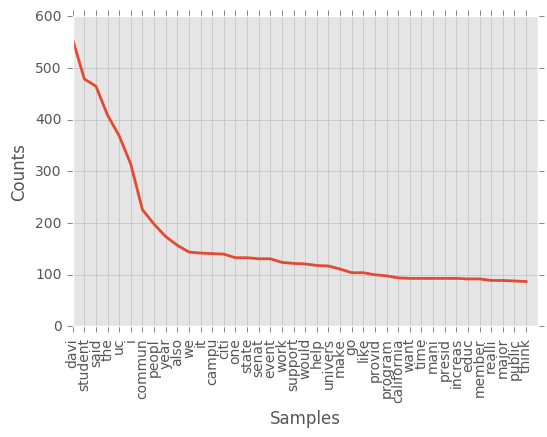

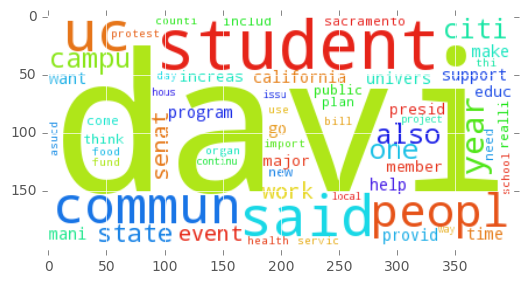

In [500]:
filter_text = tokenize_and_stem(bigdata['text'])
fdist = nltk.FreqDist(filter_text)
fdist.plot(40)

text_string = ' '.join(filter_text)
text_string

wordcloud(text_string)

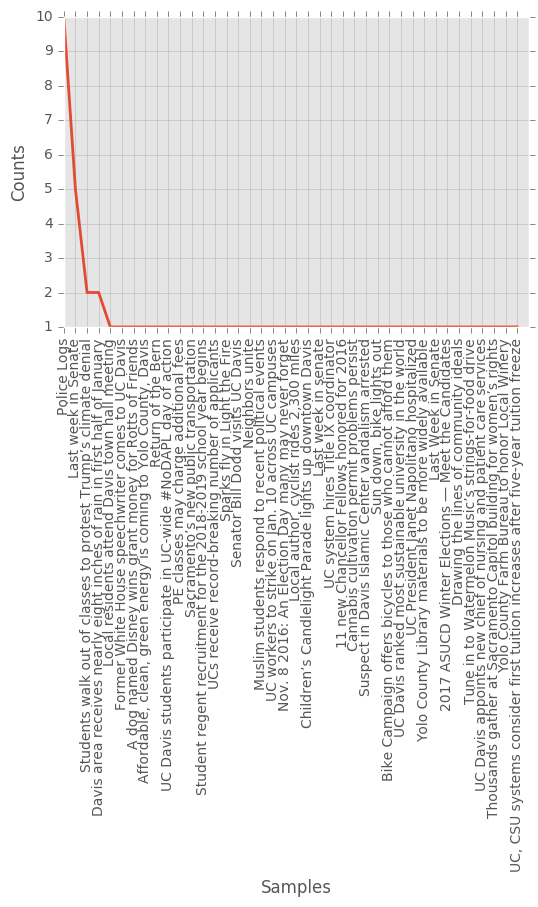

In [520]:
tokens = bigdata['title'].apply(nltk.sent_tokenize)
filter_sent = remove_stopwords(tokens)
fdist = nltk.FreqDist(filter_sent)
fdist.plot(40)

### Q: What topics does the Aggie cover the most?
The topics that covered the most are last week in senate and police log. 
Overall, the words that appeared the most is Davis and the word student comes next.

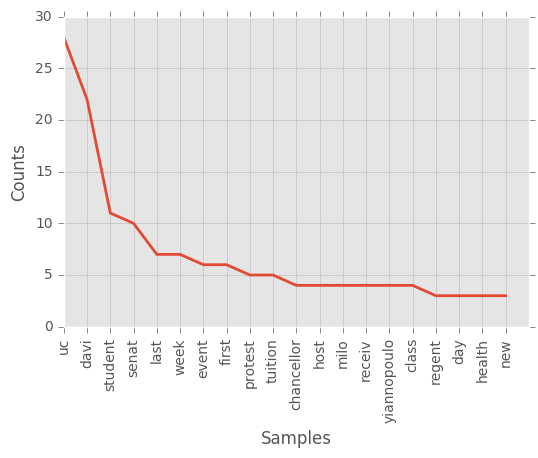

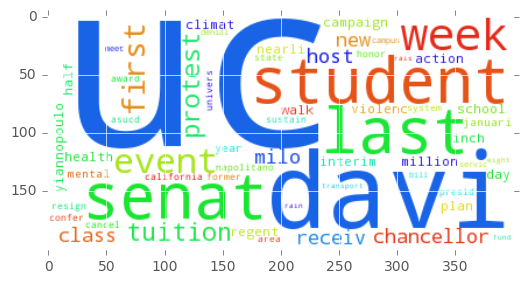

In [502]:
#campus article:
filter_title = tokenize_and_stem(df['title'])
fdist = nltk.FreqDist(filter_title)
fdist.plot(20)

text_string = ' '.join(filter_title)
text_string

wordcloud(text_string)

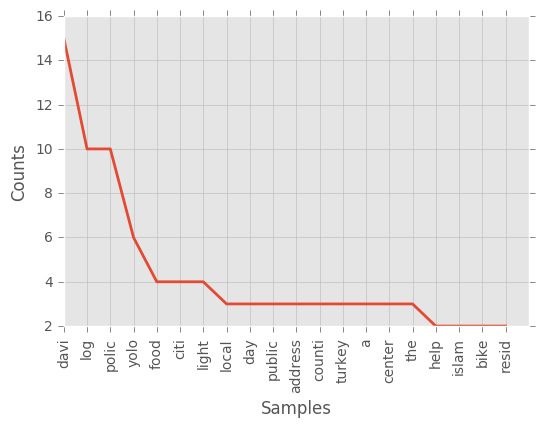

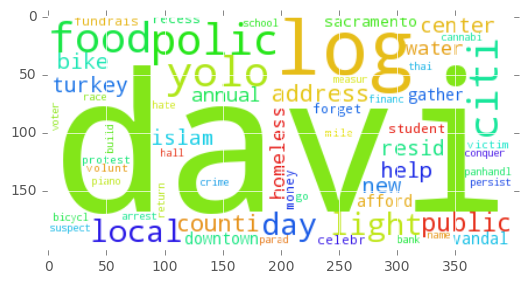

In [503]:
#city article:
filter_title = tokenize_and_stem(df2['title'])
#filter_title = [w.lower() for w in filter_title]
fdist = nltk.FreqDist(filter_title)
fdist.plot(20)

text_string = ' '.join(filter_title)
text_string

wordcloud(text_string)

### Do city articles typically cover different topics than campus articles?

yes, the campus articles have topics such as students, community, last senate, protest, tuitions. The city article contains topics like police log, food, yolo city, and local.

In [676]:
def tok_stem(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    
    filter_text =[w.lower() for w in tokens]
    filter_text = [w for w in filter_text if not w in stop_words]
    stemmer = PorterStemmer().stem
    
    #stemmer and remove punctuation and change text to lower case
    stemmed = [stemmer(w.lower()) for w in filter_text if w.isalpha()] 
    return stemmed

In [687]:
vectorizer = TfidfVectorizer(tokenizer=tok_stem,stop_words='english',smooth_idf = True, norm = None)

In [688]:
tfidf = vectorizer.fit_transform(bigdata['title'])

In [679]:
sim = tfidf.dot(tfidf.T)
sim = sim.toarray()
matrix = sim[sim > 0]

In [680]:
sortnumber = sorted(matrix, reverse = True)
#sortnumber = np.argsort(matrix)

In [681]:
topnumbers = sorted(sortnumber, reverse = True)[0:6]
topnumbers

[370.76733875066418,
 240.86770165670623,
 236.97444367962362,
 229.16833365421078,
 227.73941108694822,
 195.56346186529279]

### Q: What are the titles of the top 3 pairs of most similar articles? 


In [682]:
for i in range(0, len(topnumbers)):
    var = np.nonzero(sim == topnumbers[i])
    print bigdata['title'][var[1][0]]

AB 1887 prevents use of state funds, including UC funds, for travel to states with anti-LGBT laws
US Department of Transportation awards $14 million grant to National Center for Sustainable Transportation
Interim Chancellor Hexter, UC leaders sign letter to urge action against climate change
UC Davis graduate creates online website to connect students with professionals for career advice
Russell Boulevard intramural fields withdrawn from 2017-2027 Long Range Development Plan
Davis College Republicans club leads protest against cancellation of Milo Yiannopoulos event


### Do you think this corpus is representative of the Aggie? 

yes I think that the corpus is a good representation because from the wordclouds, we can see that it includes a lot articles thats talk about Davis, students, community, and the people.